# 给定一个B样条曲线，\sum_{i=0}^6 N_i3(u)Pi u\in [a,b]
# 解：有n-p-1 = 7个控制点， 其中p=3，则n=11

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline

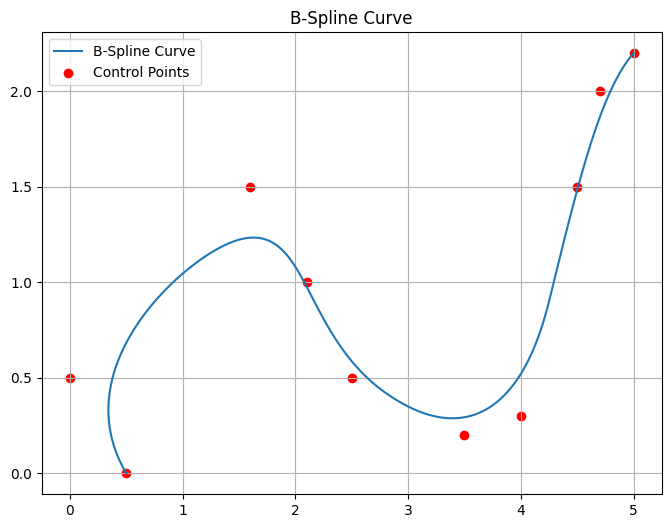

In [3]:
# 10个控制点
control_points = np.array([[0.5, 0], [0, 0.5], [1.6, 1.5], [2.1, 1], [2.5, 0.5],[3.5, 0.2], [4, 0.3], [4.5, 1.5], [4.7,2], [5, 2.2]])

# 节点矢量 (knot vector)，某个节点重合一次
knots = np.array([0,0,0,0,1,2,3,3,4,4,5,5,5,5])

# 生成B样条，k=3表示三阶
spl_x = BSpline(knots, control_points[:,0], k=3)
spl_y = BSpline(knots, control_points[:,1], k=3)


# 生成新的 x 值用于绘制曲线
x_new = np.linspace(0, 5, 1000)
x_spline1 = spl_x(x_new)
y_spline1 = spl_y(x_new)

# t取值范围（参数化范围）
t = np.linspace(0, 4, 100)

# 绘制B样条曲线
plt.figure(figsize=(8, 6))
plt.plot(x_spline1, y_spline1, label="B-Spline Curve")
plt.scatter(control_points[:, 0], control_points[:, 1], color='red', label='Control Points')
plt.title('B-Spline Curve')
plt.legend()
plt.grid(True)
plt.savefig('HW6_1.pdf', dpi=300, bbox_inches='tight')
plt.show()

# 插入3次节点，不在原节点上， \sum_{i=0}^9 N_i3(u)Pi'

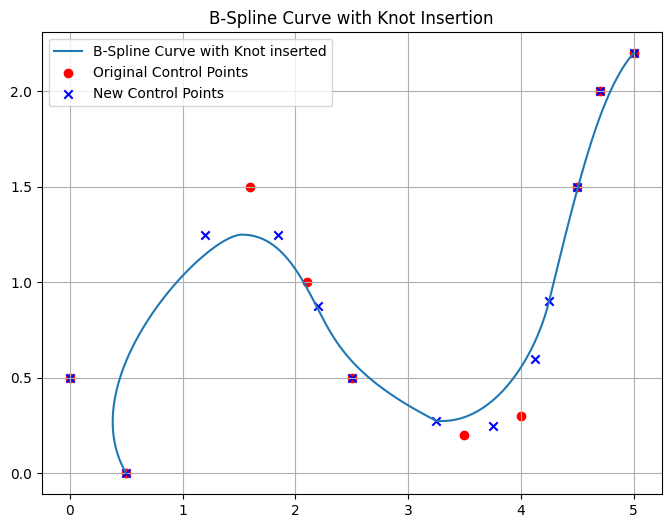

In [5]:
def insert_knot(knots, control_points, u, k, times=1):
    new_knots = knots
    new_control_points = control_points

    for _ in range(times):
        # 找到插入位置
        i = np.searchsorted(new_knots, u)

        # 插入节点
        new_knots = np.insert(new_knots, i, u)

        # 计算新的控制点
        new_control_points = np.zeros((new_control_points.shape[0] + 1, new_control_points.shape[1]))
        new_control_points[:i-k] = control_points[:i-k]
        new_control_points[i-k+1:] = control_points[i-k:]

        for j in range(i-k, i):
            alpha = (u - knots[j]) / (knots[j+k] - knots[j])
            new_control_points[j] = (1.0 - alpha) * control_points[j-1] + alpha * control_points[j]

        control_points = new_control_points

    return new_knots, new_control_points

# 10个控制点
control_points = np.array([[0.5, 0], [0, 0.5], [1.6, 1.5], [2.1, 1], [2.5, 0.5],[3.5, 0.2], [4, 0.3], [4.5, 1.5], [4.7,2], [5, 2.2]])

# 节点矢量 (knot vector)，某个节点重合一次
knots = np.array([0,0,0,0,1,2,3,3,4,4,5,5,5,5])
k = 3  # B 样条的阶数

# 插入三个不同节点
u0 = 4
new_knot_v0, new_control_points_v0 = insert_knot(knots, control_points, u0, k, times=1)
u1 = 3.5
new_knot_v1, new_control_points_v1 = insert_knot(new_knot_v0, new_control_points_v0, u1, k, times=1)
u2 = 1.5
new_knots, new_control_points = insert_knot(new_knot_v1, new_control_points_v1, u2, k, times=1)

# 创建新的 B 样条对象
spl_x = BSpline(new_knots, new_control_points[:, 0], k)
spl_y = BSpline(new_knots, new_control_points[:, 1], k)

# 生成新的 x 值用于绘制曲线
x_new = np.linspace(0, 5, 1000)
x_spline1 = spl_x(x_new)
y_spline1 = spl_y(x_new)

# 绘制 B 样条曲线
plt.figure(figsize=(8, 6))
plt.plot(x_spline1, y_spline1, label="B-Spline Curve with Knot inserted")
plt.scatter(control_points[:, 0], control_points[:, 1], color='red', label='Original Control Points')
plt.scatter(new_control_points[:, 0], new_control_points[:, 1], color='blue', label='New Control Points', marker='x')
plt.title('B-Spline Curve with Knot Insertion')
plt.legend()
plt.grid(True)
plt.savefig('HW6/HW6_2.pdf', dpi=300, bbox_inches='tight')
plt.show()

# 升阶，\sum_{i=0}^? N_i6(u)Pi'

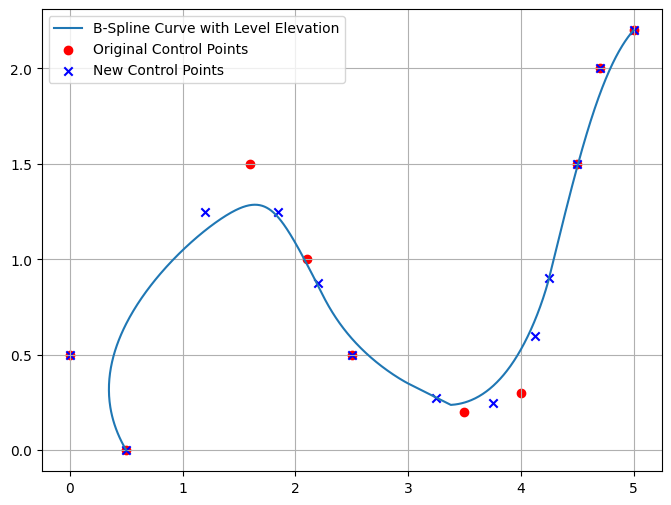

In [7]:
def insert_knot(c, t, k, t_insert):
    pos = np.searchsorted(t, t_insert)
    c_new = np.zeros((len(c)+1,2))
    for i in range(len(c_new)):
        if i < pos - k:
            c_new[i] = c[i]
        elif i < pos:
            alpha = float(t_insert - t[i]) / float(t[i+k]-t[i])
            #print(t[i], t[i+k], alpha)
            c_new[i] = alpha * c[i] + (1-alpha) * c[i-1]
        else:
            c_new[i] = c[i-1]
    t_new = np.insert(t, pos, t_insert)
    return t_new, c_new


def elev_tool(c, t, k):
    c_new = np.zeros((len(c)+1,2))
    for l in range(len(c_new)):
        alpha = float(l) / (k+1)
        if l == len(c):
            c_new[l] = alpha*c[l-1]
        else:
            c_new[l] = (1-alpha)*c[l] + alpha*c[l-1]
    t = np.insert(t,0,t[0])
    t = np.insert(t,-1,t[-1])
    return t, c_new

def elev_level(t,c,k):
    t_ori = t.copy()
    for i in range(k+1, len(t)-k-1):
        for j in range(2):
            t,c = insert_knot(c,t,k,t_insert=t_ori[i])

    i = k+1
    t_new = None
    c_new = None
    while i <= len(c):
        t_tmp = np.array([t[i-1]] * (k+1) + [t[i]] * (k+1))
        t_elev, c_elev = elev_tool(c[i-k-1:i,:],t_tmp,k)
        if t_new is None:
            t_new, c_new = t_elev, c_elev
        else:
            t_new = np.concatenate([t_new[:-1], t_elev[k+2:]])
            c_new = np.concatenate([c_new[:-1,:], c_elev], axis=0)
        i += k

    t = np.concatenate([t_new[:8],t_new[9:-6],t_new[-5:]])
    c = np.concatenate([c_new[:4,:],c_new[5:8,:],c_new[9:,:]])
    #draw(c, t, 4, np.linspace(0, 7, 1000))

    # delete u_7=2, i=r-p=3
    alpha = 0.4
    t = np.delete(t, 7)
    c = np.concatenate([c[:3,:],[(c[3,:]-(1-alpha)*c[2,:])/alpha],c[5:,:]])

    # delete u_9=5, i=r-p=5
    alpha = 0.6
    t = np.delete(t, 9)
    c = np.concatenate([c[:5,:],[(c[5,:]-(1-alpha)*c[4,:])/alpha],c[7:,:]])
    #draw(c, t, 4, np.linspace(0, 7, 1000))

    return t,c

t,c = elev_level(knots,control_points,k=3)
spl_x = BSpline(t, c[:,0], 4)
spl_y = BSpline(t, c[:,1], 4)

x_new = np.linspace(0, 5, 1000)
# 生成新的 x 值用于绘制曲线
x_spline3 = spl_x(x_new)
y_spline3 = spl_y(x_new)

# 绘制 B 样条曲线
plt.figure(figsize=(8, 6))
plt.plot(x_spline3, y_spline3, label="B-Spline Curve with Level Elevation")
plt.scatter(control_points[:, 0], control_points[:, 1], color='red', label='Original Control Points')
plt.scatter(new_control_points[:, 0], new_control_points[:, 1], color='blue', label='New Control Points', marker='x')
plt.title('')
plt.legend()
plt.grid(True)
plt.savefig('HW6/HW6_3.pdf', dpi=300, bbox_inches='tight')
plt.show()

# 对比两种情况曲线的编辑能力

# 答：因为插入节点将区间细分，所以插入节点的情况下曲线的编辑能力更好